<a href="https://colab.research.google.com/github/Harish21b/sirpi/blob/main/Linear_Regression_Sirpy_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Used Car Prices using Linear Regression

### TEAM: AI AGENTS TEAM
### MEMBERS : MAHALAKSHMI,THANGARAJ,NITHISH KUMAR,HARISH,NAGARAJ,SATHISH
### MENTOR: SUDHARSHAN SIR

### IMPORT LIBRARIES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split the data into train and test sets
from sklearn.model_selection import train_test_split

# to build a linear regression model
from sklearn.linear_model import LinearRegression

# to check a regression model's performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df_cars = pd.read_csv('/content/drive/MyDrive/Data analytics /used_cars.csv')

In [ ]:
df_cars.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


### EXPLORATORY DATA ANALSYIS

In [ ]:
df_cars.shape

(4009, 12)

In [ ]:
df_cars.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [ ]:
df_cars.nunique()

,0
brand,57
model,1898
model_year,34
milage,2818
fuel_type,7
engine,1146
transmission,62
ext_col,319
int_col,156
accident,2


In [ ]:
df = df_cars.copy()

In [ ]:
df.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,170
engine,0
transmission,0
ext_col,0
int_col,0
accident,113


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
model_year,4009.0,2015.51559,6.104816,1974.0,2012.0,2017.0,2020.0,2024.0


In [ ]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


### DATA CLEANING

In [ ]:
# Drop the 'ext_col' and 'int_col' columns
df = df.drop(columns=["ext_col", "int_col"])

# Verify the remaining columns
df.head()


,brand,model,model_year,milage,fuel_type,engine,transmission,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,None reported,NaN,"$34,999"


In [ ]:
#converting milage to numeric data type
df['milage'] = df['milage'].replace('[, mi.]', '', regex=True).astype(float)

In [ ]:
#converting price to numeric data type
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
# Extract numerical values from 'engine'
df['engine_size'] = df['engine'].str.extract(r'(\d+\.?\d*)').astype(float)

In [ ]:
df.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,170
engine,0
transmission,0
accident,113
clean_title,596
price,0


In [ ]:
# 1. Fill missing accident values with "None reported"
df["accident"].fillna("None reported", inplace=True)

# 2. Fill missing clean_title values with "Unknown"
df["clean_title"].fillna("Unknown", inplace=True)

# Display the updated missing values count
df.isnull().sum()

<ipython-input-23-a50776dc9415>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["accident"].fillna("None reported", inplace=True)
<ipython-input-23-a50776dc9415>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,170
engine,0
transmission,0
accident,0
clean_title,0
price,0


In [ ]:
# If engine size is 0 or missing, assume Electric
df.loc[df["engine_size"].isna() | (df["engine_size"] == 0), "fuel_type"] = "Electric"

# Fill remaining missing fuel types with mode
df["fuel_type"].fillna(df["fuel_type"].mode()[0], inplace=True)


In [ ]:
df['engine_size'].fillna(df['engine_size'].median(), inplace=True)

In [ ]:
df.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
accident        0
clean_title     0
price           0
engine_size     0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
model_year,4009.0,2015.515590,6.104816,1974.0,2012.0,2017.0,2020.0,2024.0
milage,4009.0,64717.551010,52296.599459,100.0,23044.0,52775.0,94100.0,405000.0
price,4009.0,44553.190322,78710.635554,2000.0,17200.0,31000.0,49990.0,2954083.0
engine_size,4009.0,271.489299,167.247327,1.2,180.0,290.0,381.0,1020.0


## Data Visualisation

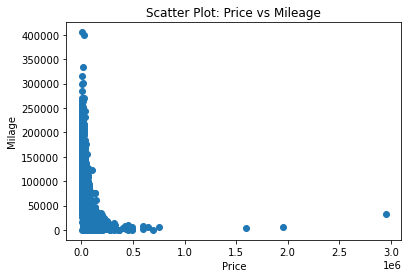

In [ ]:
plt.scatter(df['price'],df['milage'])
plt.xlabel('Price')
plt.ylabel('Milage')
plt.title("Scatter Plot: Price vs Mileage")
plt.show()

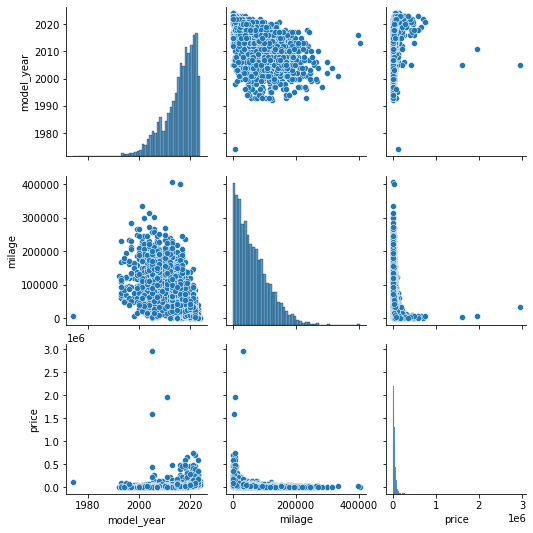

In [ ]:
# Pair Plot: Exploring relationships between numeric variables
sns.pairplot(df[["model_year", "milage", "accident", "clean_title", "price"]])
plt.show()

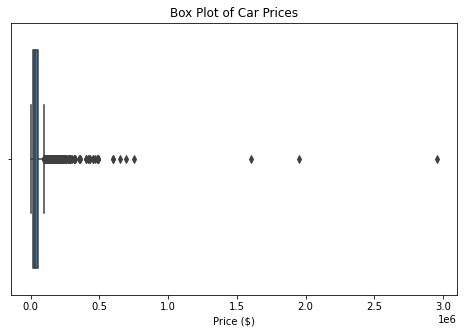

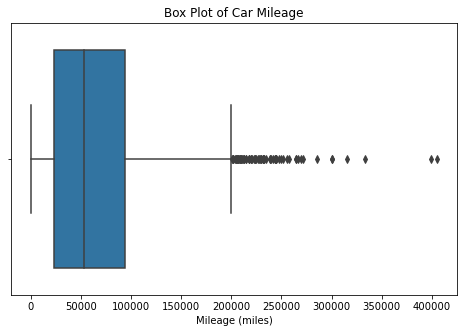

In [ ]:
#boxplot for price
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["price"])
plt.title("Box Plot of Car Prices")
plt.xlabel("Price ($)")
plt.show()

# Boxplot for Mileage
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["milage"])
plt.title("Box Plot of Car Mileage")
plt.xlabel("Mileage (miles)")
plt.show()

In [ ]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers in 'price' and 'milage'
outliers_price, lb_price, ub_price = detect_outliers_iqr(df, "price")
outliers_milage, lb_milage, ub_milage = detect_outliers_iqr(df, "milage")

# Count of outliers detected
len(outliers_price), len(outliers_milage)


(244, 69)

## There are 244 outliers in the price and 69 in the milage

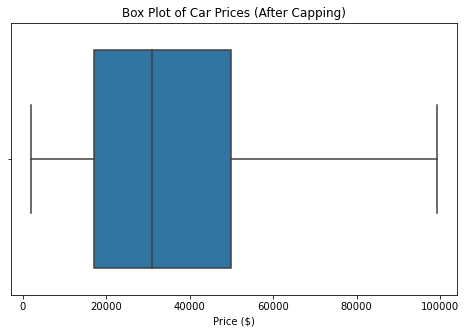

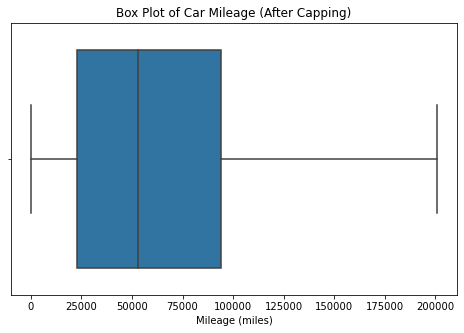

In [ ]:
# Function to cap outliers using IQR method
def cap_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    return data

# Apply capping to 'price' and 'milage'
df = cap_outliers_iqr(df, "price")
df = cap_outliers_iqr(df, "milage")

# Verify changes with new boxplots
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["price"])
plt.title("Box Plot of Car Prices (After Capping)")
plt.xlabel("Price ($)")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["milage"])
plt.title("Box Plot of Car Mileage (After Capping)")
plt.xlabel("Mileage (miles)")
plt.show()


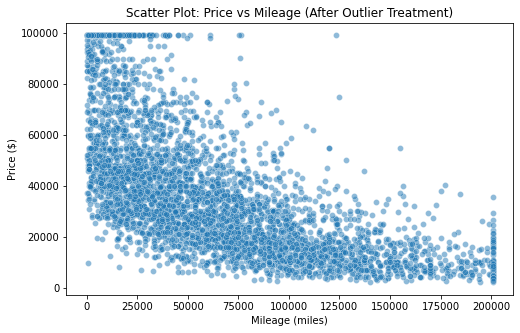

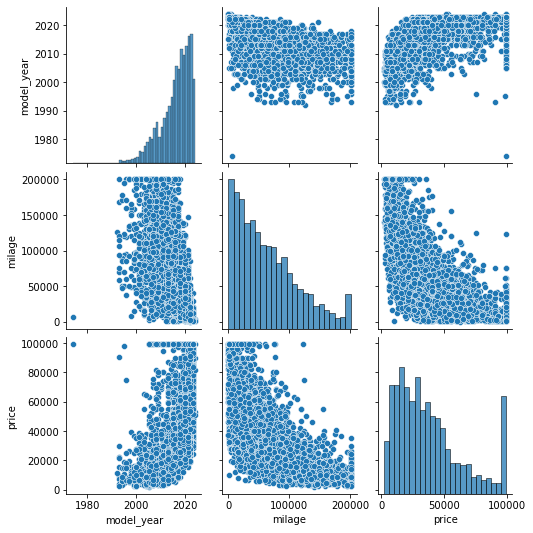

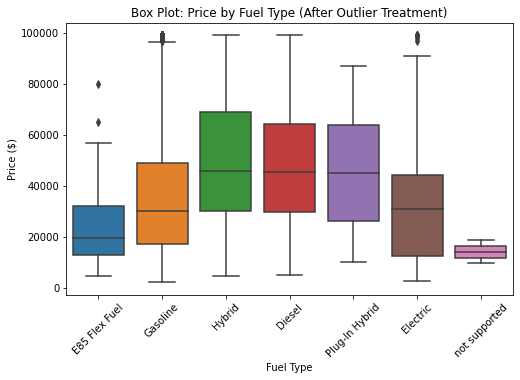

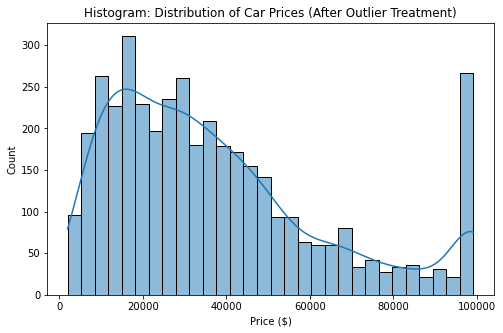

In [ ]:
# Scatter Plot: Price vs Mileage (After Outlier Treatment)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["milage"], y=df["price"], alpha=0.5)
plt.xlabel("Mileage (miles)")
plt.ylabel("Price ($)")
plt.title("Scatter Plot: Price vs Mileage (After Outlier Treatment)")
plt.show()

# Pair Plot: Exploring relationships after outlier treatment
sns.pairplot(df[["model_year", "milage", "accident", "clean_title", "price"]])
plt.show()

# Box Plot: Price distribution by Fuel Type (After Outlier Treatment)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["fuel_type"], y=df["price"])
plt.xticks(rotation=45)
plt.xlabel("Fuel Type")
plt.ylabel("Price ($)")
plt.title("Box Plot: Price by Fuel Type (After Outlier Treatment)")
plt.show()

# Histogram: Price Distribution (After Outlier Treatment)
plt.figure(figsize=(8, 5))
sns.histplot(df["price"], bins=30, kde=True)
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.title("Histogram: Distribution of Car Prices (After Outlier Treatment)")
plt.show()


In [ ]:
df.corr()

,model_year,milage,price,engine_size
model_year,1.000000,-0.625307,0.551346,-0.086210
milage,-0.625307,1.000000,-0.657797,-0.004413
price,0.551346,-0.657797,1.000000,0.228982
engine_size,-0.086210,-0.004413,0.228982,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4009 non-null   object 
 1   model         4009 non-null   object 
 2   model_year    4009 non-null   int64  
 3   milage        4009 non-null   float64
 4   fuel_type     4009 non-null   object 
 5   engine        4009 non-null   object 
 6   transmission  4009 non-null   object 
 7   accident      4009 non-null   object 
 8   clean_title   4009 non-null   object 
 9   price         4009 non-null   float64
 10  engine_size   4009 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 344.6+ KB


In [ ]:
# creating one-hot encoded (also called dummy) variables
X = pd.get_dummies(
    df,    # defining the dataframe from where to fetch the data
    columns=df.select_dtypes(include=["object"]).columns.tolist(),    # defining the type of columns for which dummies will be made
    drop_first=True,    # dropping the first dummy column
)


In [ ]:
X

,model_year,milage,price,engine_size,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,...,transmission_Manual,"transmission_Manual, 6-Spd",transmission_SCHEDULED FOR OR IN PRODUCTION,transmission_Single-Speed Fixed Gear,transmission_Transmission Overdrive Switch,transmission_Transmission w/Dual Shift Mode,transmission_Variable,transmission_–,accident_None reported,clean_title_Yes
0,2013,51000.0,10300.0,300.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2021,34742.0,38005.0,3.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2022,22372.0,54598.0,3.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2015,88900.0,15500.0,354.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,2021,9835.0,34999.0,2.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,2023,714.0,99175.0,6.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
4005,2022,10900.0,53900.0,349.0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4006,2022,2116.0,90998.0,290.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4007,2020,33000.0,62999.0,450.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [ ]:
X.columns

Index(['model_year', 'milage', 'price', 'engine_size', 'brand_Alfa',
       'brand_Aston', 'brand_Audi', 'brand_BMW', 'brand_Bentley',
       'brand_Bugatti',
       ...
       'transmission_Manual', 'transmission_Manual, 6-Spd',
       'transmission_SCHEDULED FOR OR IN PRODUCTION',
       'transmission_Single-Speed Fixed Gear',
       'transmission_Transmission Overdrive Switch',
       'transmission_Transmission w/Dual Shift Mode', 'transmission_Variable',
       'transmission_–', 'accident_None reported', 'clean_title_Yes'],
      dtype='object', length=3171)

In [ ]:
print(X.columns.tolist())  # Displays all column names

['model_year', 'milage', 'price', 'engine_size', 'brand_Alfa', 'brand_Aston', 'brand_Audi', 'brand_BMW', 'brand_Bentley', 'brand_Bugatti', 'brand_Buick', 'brand_Cadillac', 'brand_Chevrolet', 'brand_Chrysler', 'brand_Dodge', 'brand_FIAT', 'brand_Ferrari', 'brand_Ford', 'brand_GMC', 'brand_Genesis', 'brand_Honda', 'brand_Hummer', 'brand_Hyundai', 'brand_INFINITI', 'brand_Jaguar', 'brand_Jeep', 'brand_Karma', 'brand_Kia', 'brand_Lamborghini', 'brand_Land', 'brand_Lexus', 'brand_Lincoln', 'brand_Lotus', 'brand_Lucid', 'brand_MINI', 'brand_Maserati', 'brand_Maybach', 'brand_Mazda', 'brand_McLaren', 'brand_Mercedes-Benz', 'brand_Mercury', 'brand_Mitsubishi', 'brand_Nissan', 'brand_Plymouth', 'brand_Polestar', 'brand_Pontiac', 'brand_Porsche', 'brand_RAM', 'brand_Rivian', 'brand_Rolls-Royce', 'brand_Saab', 'brand_Saturn', 'brand_Scion', 'brand_Subaru', 'brand_Suzuki', 'brand_Tesla', 'brand_Toyota', 'brand_Volkswagen', 'brand_Volvo', 'brand_smart', 'model_128 i', 'model_135 i', 'model_135 is',

In [ ]:
df_cleaned = df.copy()

In [ ]:
df_final = pd.concat([df, X], axis=1)

In [ ]:
df_final.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,accident,clean_title,price,...,transmission_Manual,"transmission_Manual, 6-Spd",transmission_SCHEDULED FOR OR IN PRODUCTION,transmission_Single-Speed Fixed Gear,transmission_Transmission Overdrive Switch,transmission_Transmission w/Dual Shift Mode,transmission_Variable,transmission_–,accident_None reported,clean_title_Yes
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,At least 1 accident or damage reported,Yes,10300.0,...,0,0,0,0,0,0,0,0,0,1
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,At least 1 accident or damage reported,Yes,38005.0,...,0,0,0,0,0,0,0,0,0,1
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,None reported,Unknown,54598.0,...,0,0,0,0,0,0,0,0,1,0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,None reported,Yes,15500.0,...,0,0,0,0,0,0,0,0,1,1
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,None reported,Unknown,34999.0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
print(df_final.select_dtypes(include=["object"]).columns)


Index(['brand', 'model', 'fuel_type', 'engine', 'transmission', 'accident',
       'clean_title'],
      dtype='object')


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Columns: 3182 entries, brand to clean_title_Yes
dtypes: float64(6), int64(2), object(7), uint8(3167)
memory usage: 12.6+ MB


In [ ]:
df_final.shape

(4009, 3182)

In [ ]:
df_final = df_final.drop(columns=['brand', 'model', 'fuel_type', 'engine', 'transmission', 'accident', 'clean_title'])

In [ ]:
df_final.shape

(4009, 3175)

### MODEL TRAINING

In [ ]:
# Define features (X) and target variable (y)
X = df_final.drop(columns=["price"])  # All features except 'price'
y = df_final["price"]  # Target variable

In [ ]:
# splitting the data in 80:20 ratio for train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,    # specifying the independent variables
    y,    # specifying the dependent variable
    test_size=0.20,    # specifying the size of the test set as a fraction of the whole data
    random_state=42    # specifying a seed value to enable reproducible results
)

In [ ]:
# creating an instance of the linear regression model
model = LinearRegression()

# fitting the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Coefficient or slope:",model.coef_)

Coefficient or slope: [[ 1.06383570e+03 -6.01434471e-02  2.55599579e+01 ...  7.28363942e+04
   5.40188915e+02  1.35217874e+03]
 [ 1.06383570e+03 -6.01434471e-02  2.55599579e+01 ...  7.28363942e+04
   5.40188915e+02  1.35217874e+03]]


In [ ]:
print("Intercept: ",model.intercept_)

Intercept:  [-4258464.62827871 -4258464.62827871]


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

### EVALUATION

In [ ]:
# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2, mae, rmse

(0.6880997444623199, 9017.296791690147, 14534.697936317509)

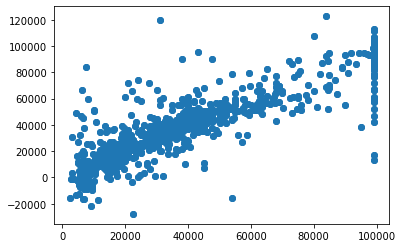

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
residuals = y_test - y_pred
print(residuals)

             price         price
2580   -833.124558   -833.124558
3660    -64.827251    -64.827251
897   -3533.439101  -3533.439101
2091  -2023.626934  -2023.626934
1044   7735.189722   7735.189722
...            ...           ...
283    1559.003301   1559.003301
712  -14171.838086 -14171.838086
274   12661.771234  12661.771234
2279   5241.097619   5241.097619
621    3853.205284   3853.205284

[802 rows x 2 columns]


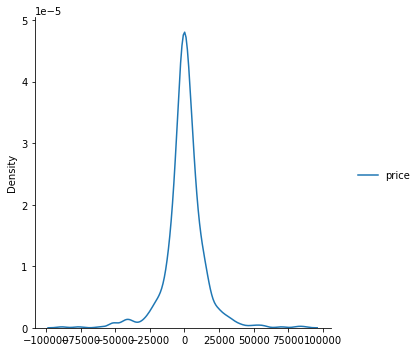

In [ ]:
## plot this residuals
sns.displot(residuals,kind='kde')

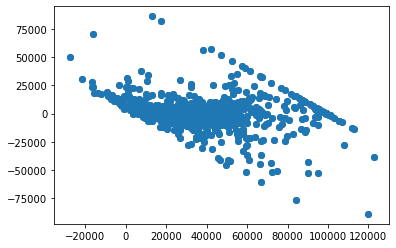

In [ ]:
# scatter plot with respect to predictions and resiuals
plt.scatter(y_pred,residuals)

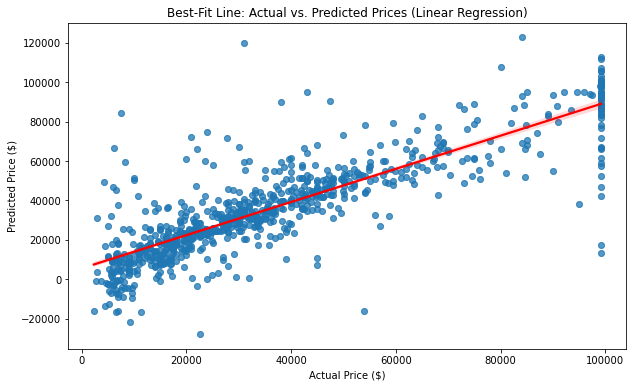

In [ ]:
# Ensure y_test and y_pred are 1D arrays
y_test_series = pd.Series(y_test.values.ravel())  # Flatten to 1D
y_pred_series = pd.Series(y_pred.ravel())  # Flatten to 1D

# Plot Best-Fit Line
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test_series, y=y_pred_series, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Actual Price ($)")
plt.ylabel("Predicted Price ($)")
plt.title("Best-Fit Line: Actual vs. Predicted Prices (Linear Regression)")
plt.show()


## OBSERVATIONS/INFERENCES

## 1. Identifying the most influential factors affecting price using correlation analysis

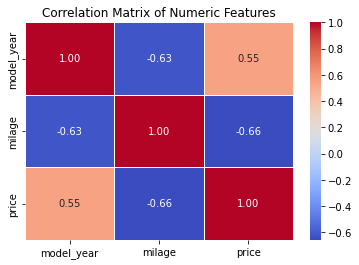

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Identifying the most influential factors affecting price using correlation analysis
numeric_columns = ['model_year', 'milage', 'price']
correlation_matrix = df[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


## The heatmap shows the correlation between numerical features and price:

### 1) Model Year (0.55 correlation with price): Newer models tend to have higher prices.
### 2) Mileage (-0.66 correlation with price): Higher mileage generally decreases the price.


## 2. Effect of accident history and clean title on resale value

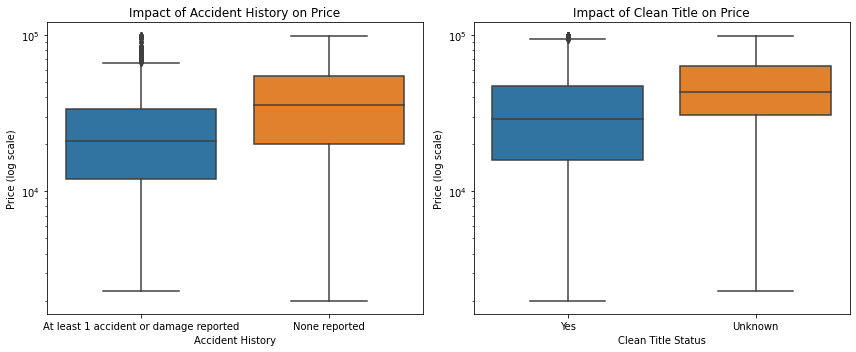

In [ ]:
plt.figure(figsize=(12, 5))

# Accident history impact
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='accident', y='price')
plt.yscale('log')
plt.title("Impact of Accident History on Price")
plt.xlabel("Accident History")
plt.ylabel("Price (log scale)")

# Clean title impact
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='clean_title', y='price')
plt.yscale('log')
plt.title("Impact of Clean Title on Price")
plt.xlabel("Clean Title Status")
plt.ylabel("Price (log scale)")

plt.tight_layout()
plt.show()


### The box plots indicate:

### Accident history lowers resale value: Cars with reported accidents tend to have lower prices compared to those without accidents.
### Clean title increases value: Vehicles with a clean title (no legal or damage issues) are generally priced higher.

# 3. Impact of model year on price

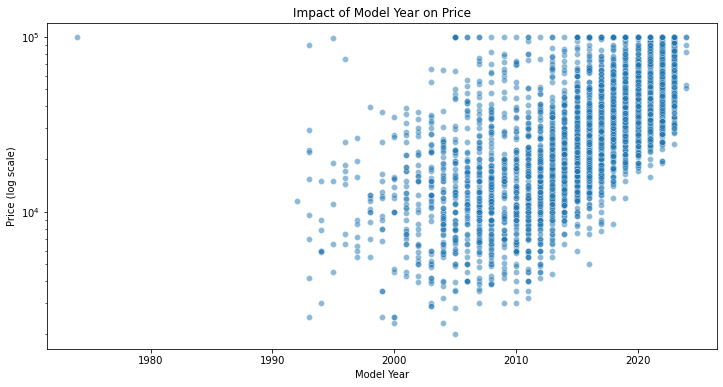

In [ ]:
# 3. Impact of model year on price

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='model_year', y='price', alpha=0.5)
plt.yscale('log')  # Log scale for better visualization
plt.title("Impact of Model Year on Price")
plt.xlabel("Model Year")
plt.ylabel("Price (log scale)")
plt.show()


### The scatter plot shows that newer model years are generally priced higher, confirming that vehicle age significantly influences resale value.

# 4. Effect of fuel type on resale value

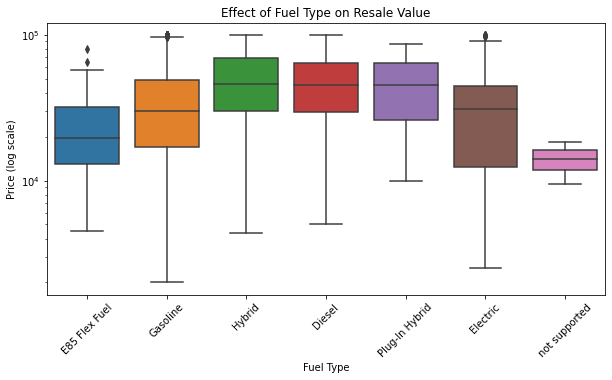

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='fuel_type', y='price')
plt.yscale('log')  # Log scale for better visualization
plt.title("Effect of Fuel Type on Resale Value")
plt.xlabel("Fuel Type")
plt.ylabel("Price (log scale)")
plt.xticks(rotation=45)
plt.show()


### Gasoline cars dominate the market and show a wide price range.
### Hybrid & Electric cars generally retain higher resale values, likely due to increasing demand for fuel efficiency and sustainability.
### Diesel vehicles tend to have lower resale prices, possibly due to reduced demand in certain regions.

# 5. Mileage range with the most significant depreciation

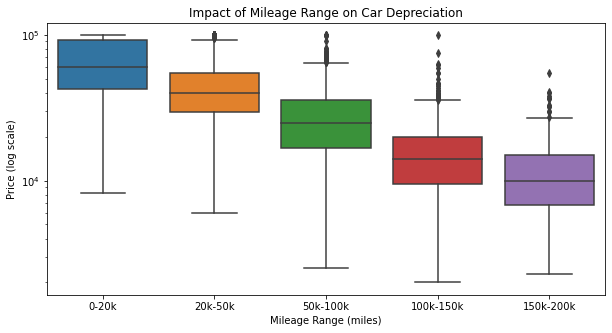

In [ ]:
# Categorizing mileage into bins
df['mileage_category'] = pd.cut(df['milage'], bins=[0, 20000, 50000, 100000, 150000, 200000],
                                labels=['0-20k', '20k-50k', '50k-100k', '100k-150k', '150k-200k'])

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='mileage_category', y='price', order=['0-20k', '20k-50k', '50k-100k', '100k-150k', '150k-200k'])
plt.yscale('log')  # Log scale for better visualization
plt.title("Impact of Mileage Range on Car Depreciation")
plt.xlabel("Mileage Range (miles)")
plt.ylabel("Price (log scale)")
plt.show()


### Cars with 0-20k miles retain the highest resale value.
### Significant depreciation occurs between 50k-100k miles, where prices drop noticeably.
### Beyond 150k miles, most vehicles have a lower resale value, indicating that buyers may be cautious about high-mileage cars.